In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Concrete_Data.csv")
df

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.isnull().sum()

Cement              0
Slag                0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
strength            0
dtype: int64

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [ ]:
X_train.shape

(824, 8)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
input = Input(shape=X_train.shape[1:])

x = Dense(units=100, activation="relu")(input)
x = Dense(units=50, activation="relu")(x)

output = Dense(units=1, activation="linear")(x)

In [ ]:
model = Model(inputs=[input], outputs=[output])

In [ ]:
from keras import backend as k

def r2_keras(y_true, y_pred):
  SS_res = k.sum(k.square(y_true-y_pred))
  SS_tot = k.sum(k.square(y_true-k.mean(y_true)))
  return (1-SS_res/(SS_tot+k.epsilon()))

In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=[r2_keras])

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.1, batch_size=32)

Epoch 1/150
24/24 [==============================] - 1s 11ms/step - loss: 1372.5438 - r2_keras: -3.8525 - val_loss: 674.9772 - val_r2_keras: -1.3798
Epoch 2/150
24/24 [==============================] - 0s 4ms/step - loss: 276.1238 - r2_keras: -0.0740 - val_loss: 218.6531 - val_r2_keras: 0.1836
Epoch 3/150
24/24 [==============================] - 0s 4ms/step - loss: 176.5331 - r2_keras: 0.3282 - val_loss: 176.4692 - val_r2_keras: 0.3509
Epoch 4/150
24/24 [==============================] - 0s 5ms/step - loss: 136.9850 - r2_keras: 0.4606 - val_loss: 150.3317 - val_r2_keras: 0.4319
Epoch 5/150
24/24 [==============================] - 0s 4ms/step - loss: 120.8626 - r2_keras: 0.5280 - val_loss: 152.0163 - val_r2_keras: 0.4365
Epoch 6/150
24/24 [==============================] - 0s 4ms/step - loss: 108.3012 - r2_keras: 0.5608 - val_loss: 133.9251 - val_r2_keras: 0.4980
Epoch 7/150
24/24 [==============================] - 0s 3ms/step - loss: 95.1067 - r2_keras: 0.6426 - val_loss: 124.1726 - va

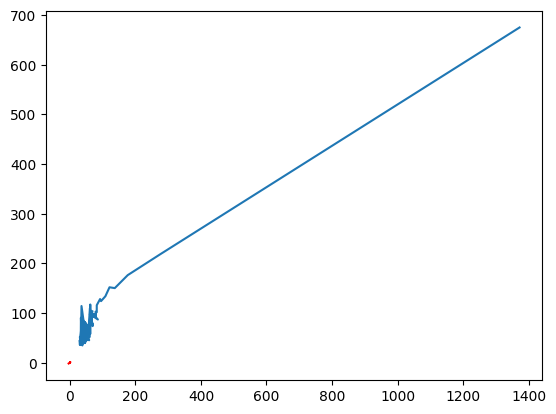

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], history.history["val_loss"])
plt.plot(history.history["r2_keras"], history.history["val_r2_keras"], color="red")